In [946]:
import numpy as np
import matplotlib.pylab as plt
import xarray as xr
import seaborn as sns
import pandas as pd
import pandas as pd
from scipy.stats import norm
import matplotlib.gridspec as gridspec
seaborn.set()
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (18, 12),
         'axes.labelsize': 28,
         'axes.titlesize':28,
         'xtick.labelsize':28,
         'ytick.labelsize':28,
         'axes.labelweight':'bold',
          'legend.fontsize': 28}
         
plt.rcParams.update(params)
#plt.matplotlib.rc('font', **font)

In [502]:
# Commad to change read permision zarr arrays
# sudo chmod -R ugo+r DROvv.zarr/

In [3]:
# Load MeerKAT baseline
bl_len = pd.read_csv('/data/isaac/DR1/meerkatbaselinelengh.csv')
bl_len = bl_len.iloc[:,1:].values[0]
# Baseline index sorted by ascending order
indx = np.argsort(bl_len)

In [975]:
###### Path to the DR0 and DR1 data-set
#FileName1 = '/data/isaac/DR0/verification/verifDR0.zarr/'#'/data/isaac/DR0/Single_obsDR0/DR0Full2.zarr/'
#FileName2 = '/data/isaac/DR1/verification/verifDR1.zarr/'
FileName1 = '/data/isaac/DROvv.zarr/'
FileName2 = '/data/HPRFI/DR1VV.zarr/'
##### Loading the data
MyData1 = xr.open_zarr(FileName1)
MyData2 = xr.open_zarr(FileName2)
##### Combining two dataset
data = MyData1+MyData2
##### Extracting the Master and the Counter array
MyMaster = data.master.astype(float)
MyCounter =data.counter.astype(float)
freqValues = data.frequency.values/1e6

In [976]:
def mean(MyMaster,MyCounter):
    '''
    Takes the master and counter as well as dimension u are
    interested in.
    
    Returns : Probability array for the dimension u chose. 
    '''
    print('time')
    MyMeanTimeMaster = MyMaster.sum(dim = ['frequency','baseline','elevation','azimuth']) 
    MyMeanTimeCounter = MyCounter.sum(dim = ['frequency','baseline','elevation','azimuth'])
    MyMeanTimeProb = MyMeanTimeMaster.astype(float)/MyMeanTimeCounter.astype(float)
    time = MyMeanTimeProb.persist().values
    
    print('frequency')
    MyMeanFreqMaster = MyMaster.sum(dim = ['time','baseline','elevation','azimuth']) 
    MyMeanFreqCounter = MyCounter.sum(dim = ['time','baseline','elevation','azimuth'])
    MyMeanFreqProb = MyMeanFreqMaster.astype(float)/MyMeanFreqCounter.astype(float)
    freq = MyMeanFreqProb.persist().values
    
    print('elevation')
    MyMeanElMaster = MyMaster.sum(dim = ['frequency','baseline','time','azimuth']) 
    MyMeanElCounter = MyCounter.sum(dim = ['frequency','baseline','time','azimuth'])
    MyMeanElProb = MyMeanElMaster.astype(float)/MyMeanElCounter.astype(float)
    el = MyMeanElProb.persist().values
    

    print('baseline')
    MyMeanBlMaster = MyMaster.sum(dim = ['frequency','time','elevation','azimuth']) 
    MyMeanBlCounter = MyCounter.sum(dim = ['frequency','time','elevation','azimuth'])
    MyMeanBlProb = MyMeanBlMaster.astype(float)/MyMeanBlCounter.astype(float)
    bl = MyMeanBlProb.persist().values
        
    print('azimuth')
    MyMeanAzMaster = MyMaster.sum(dim = ['frequency','baseline','elevation','time']) 
    MyMeanAzCounter = MyCounter.sum(dim = ['frequency','baseline','elevation','time'])
    MyMeanAzProb = MyMeanAzMaster.astype(float)/MyMeanAzCounter.astype(float)
    az = MyMeanAzProb.persist().values
    return time,freq,bl,el,az

In [977]:
ave = mean(MyMaster,MyCounter) 

time
frequency
elevation
baseline
azimuth


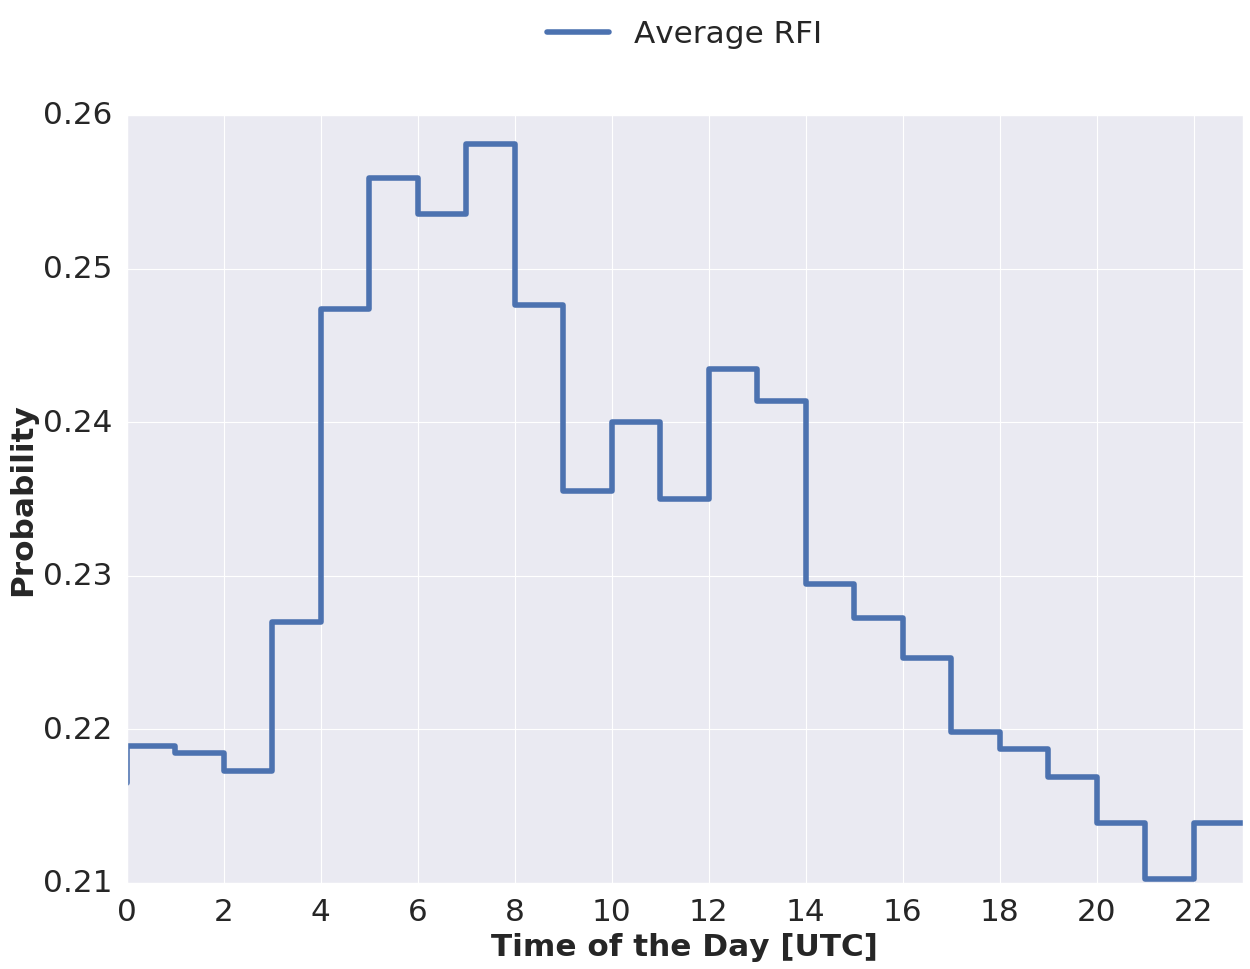

In [978]:
#plt.figure(figsize=(12,8))
plt.step(np.arange(ave[0].shape[0]),ave[0],label='Average RFI',linewidth=5)
plt.xlabel('Time of the Day [UTC]',fontsize=28)
plt.ylabel('Probability',fontsize=28)
plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)
plt.xlim(0,23)
plt.xticks(np.arange(0,23,step=2))
#plt.legend(loc='lower right')
plt.show()

In [992]:
ii = np.where((freqValues>=962)&(freqValues<=1213))[0]

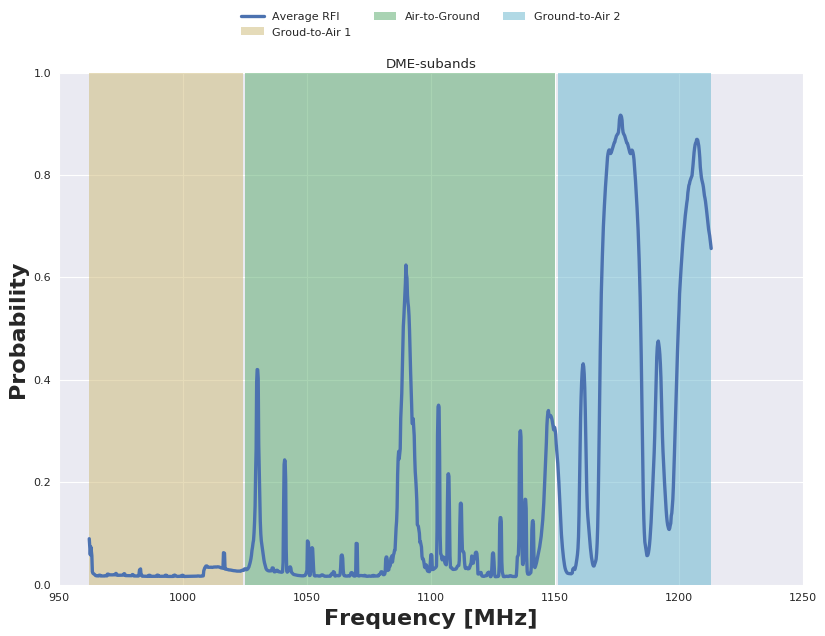

In [1003]:
plt.figure(figsize=(12,8))
plt.plot(freqValues[ii],ave[1][ii],label='Average RFI',linewidth=3)
plt.axvspan(962, 1024, color='y', alpha=0.5, lw=0,label='Groud-to-Air 1')
plt.axvspan(1025, 1150, color='g', alpha=0.5, lw=0,label='Air-to-Ground')
plt.axvspan(1151, 1213, color='c', alpha=0.5, lw=0,label='Ground-to-Air 2')
plt.xlabel('Frequency [MHz]',fontsize=20)
plt.ylabel('Probability',fontsize=20)
plt.title('DME-subands')
plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)
plt.show()

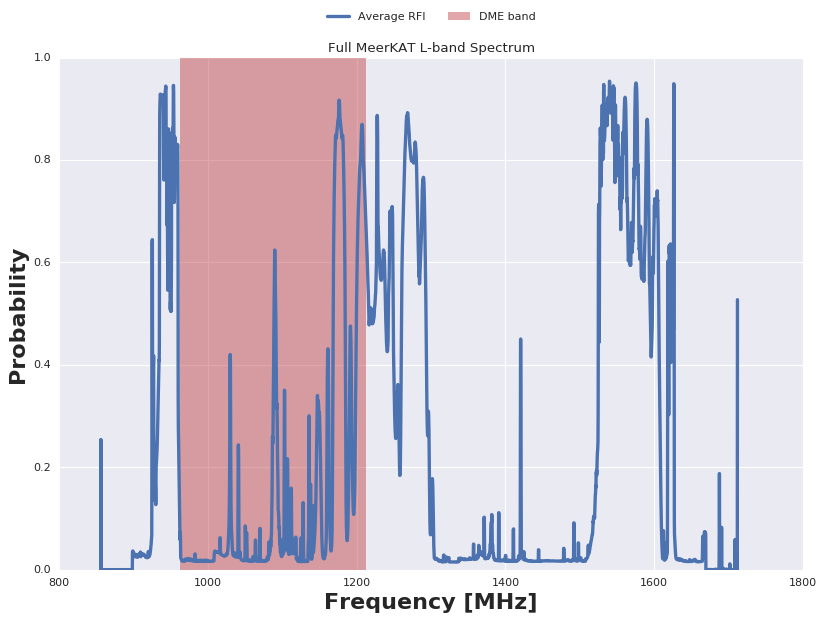

In [1001]:
plt.figure(figsize=(12,8))
plt.plot(freqValues,ave[1],label='Average RFI',linewidth=3)
plt.xlabel('Frequency [MHz]',fontsize=20)
plt.axvspan(962, 1213, color='r', alpha=0.5, lw=0,label='DME band')
plt.ylabel('Probability',fontsize=20)
plt.title('Full MeerKAT L-band Spectrum')
plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)
plt.show()

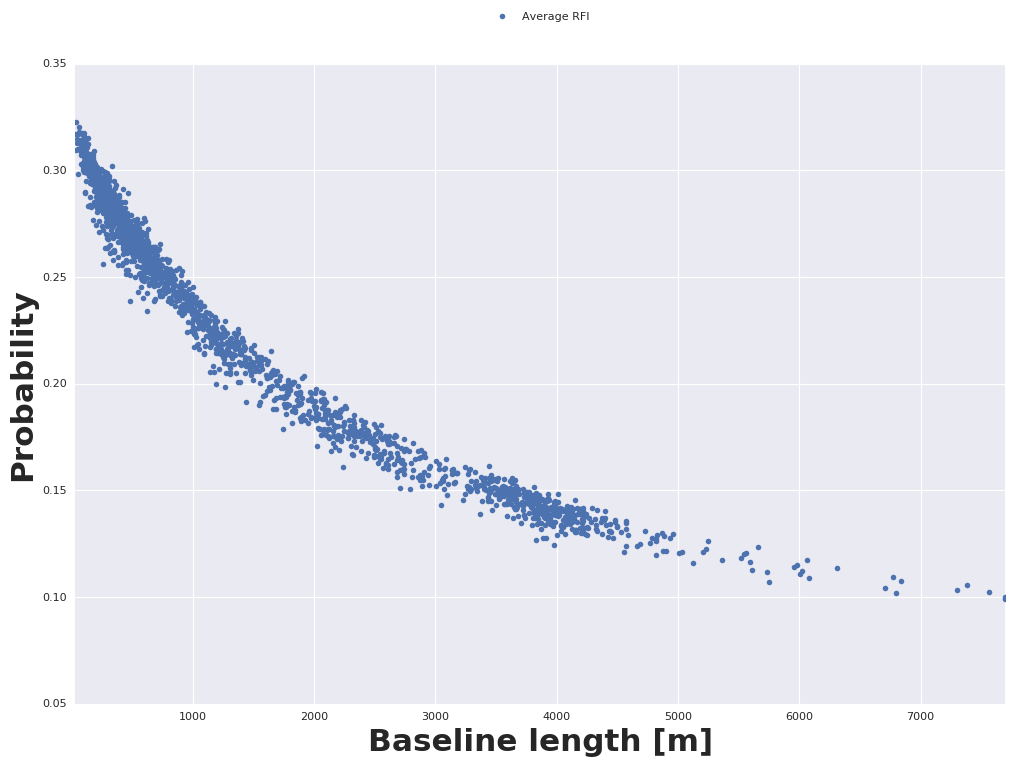

In [987]:
plt.figure(figsize=(15,10))
plt.plot(bl_len[indx][ii],ave[2][indx][ii],'.',label='Average RFI',ms=10)
plt.xlabel('Baseline length [m]',fontsize=28)
plt.ylabel('Probability',fontsize=28)
plt.xlim(bl_len[indx][ii][0],bl_len[indx][ii][-1])
plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)
plt.show()


In [988]:
plt.style.use('seaborn')

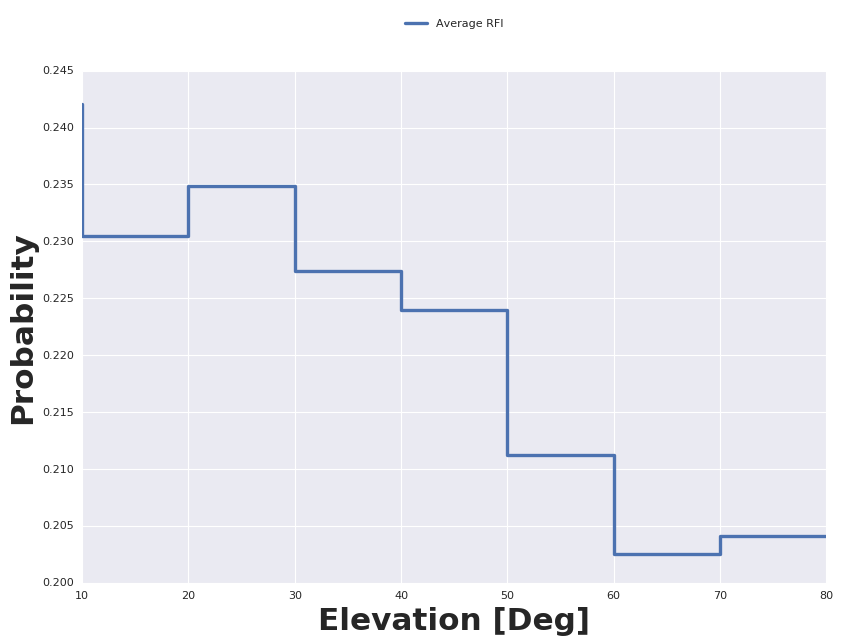

In [989]:
plt.figure(figsize=(12,8))
plt.step(np.arange(ave[3].shape[0]),ave[3],label='Average RFI',linewidth=3)
plt.xlabel('Elevation [Deg]',fontsize=28)
plt.ylabel('Probability',fontsize=28)
plt.xticks(np.arange(ave[3].shape[0]),np.arange(10,100,10))
plt.xlim(np.arange(ave[3].shape[0])[0],np.arange(ave[3].shape[0])[-1])
plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True,framealpha=0.7,borderpad=1)
plt.show()

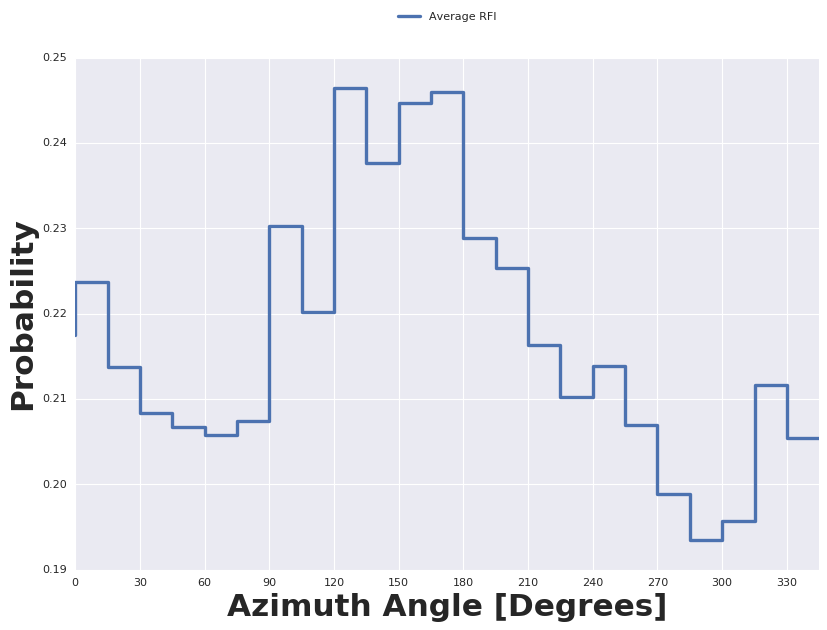

In [990]:
plt.figure(figsize=(12,8))
plt.step(np.arange(ave[4].shape[0]),ave[4],label='Average RFI',linewidth=3)
plt.xlabel('Azimuth Angle [Degrees]',fontsize=28)
plt.ylabel('Probability',fontsize=28)
plt.xlim(np.arange(ave[4].shape[0])[0],np.arange(ave[4].shape[0])[-1])
plt.xticks(np.arange(0,ave[4].shape[0],2),np.arange(0,360,30))
plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)
plt.show()

In [1320]:
freq_con = np.load('/data/isaac/DR1/freq_cov.npy')

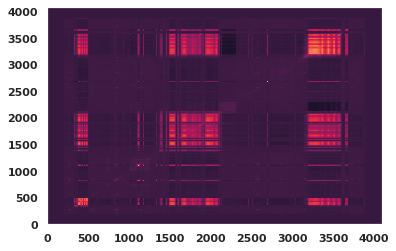

In [1321]:
plt.pcolor(freq_con)

In [1110]:
import os
def Get_zarr(path2zarr):
    fls = os.listdir(path2zarr)
    zarr = []
    for f in fls:
        if 'verFileDR0.zarr1' in f:
            zarr.append(path2zarr+f)
    return zarr
            
path2zarr= '/data/isaac/DR1/resultsdr1/'
fname = Get_zarr(path2zarr)
fname = fname

In [1083]:
fname = [fname[0]]

In [1084]:
fname

['/data/isaac/DR1/resultsdr1/DR1.zarr1538155346_sdp_l0.full.rdb']

In [1040]:
fn = []
for i in range(1):
    fn.append('http://archive-gw-1.kat.ac.za:7480/'+fname[i][35:45]+'/'+str(fname[i][35:]))

In [1041]:
fn

['http://archive-gw-1.kat.ac.za:7480/1538155346/1538155346_sdp_l0.full.rdb']

In [1042]:
df = pd.read_csv('/data/isaac/DR1/resultsdr1/All_2018_imaging_observations.csv')

In [1043]:
df_new = df[df.FullLink.isin(fn)]

In [1044]:
df_new

,Unnamed: 0,index,Owner,UTC_Start,UTC_End,UT_sec,ScheduleBlock_ID,Description,NoChannels,No_Ants,FileSize_kB,LiteLink,FullLink
293,293,287,Sharmila,2018-09-28 17:22:35.148000,2018-09-28 17:42:26.644000,1191.496,20180928-0005,Thunderkat: J17591-234,4096,62,185.67,http://archive-gw-1.kat.ac.za:7480/1538155346/...,http://archive-gw-1.kat.ac.za:7480/1538155346/...


In [1074]:
def open_Zarr(fname):

    zarrf = xr.open_zarr(fname)
    freq = zarrf.frequency.values/1e6
    m = zarrf.master.sum(dim = ['baseline','elevation','azimuth'])
    c = zarrf.counter.sum(dim = ['baseline','elevation','azimuth'])
    p = m.astype(float)/c.astype(float)

    return p.values

In [1075]:
zarrf = open_Zarr(fname[0])
#freq = zarrf.frequency.values/1e6
#m = zarrf.master.sum(dim = ['baseline','elevation','azimuth'])
#c = zarrf.counter.sum(dim = ['baseline','elevation','azimuth'])
#p = m.astype(float)/c.astype(float)

/home/isaac/.local/lib/python3.6/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*args2)


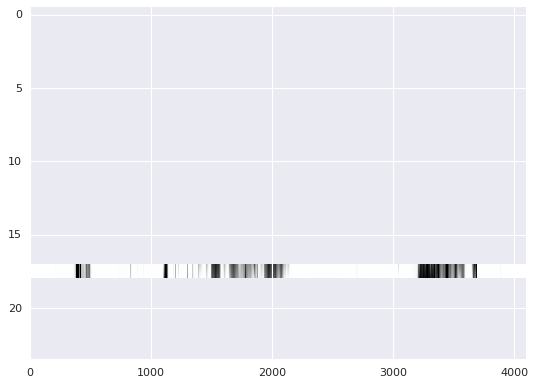

In [1079]:
plt.imshow(zarrf,aspect='auto')

In [1086]:
ave_mon = []
for i in range(len(fname)):
    print('Adding file {} : {}'.format(i,fname[i][32:]))
    try:
        p = open_Zarr(fname[i])
        print('Mean has been computed for file ',i)
        start = df_new.loc[df['FullLink']==fn[i]]['UTC_Start'].values[0][0:7]
        end = df_new.loc[df['FullLink']==fn[i]]['UTC_End'].values[0][0:7]
        obslen = df_new.loc[df['FullLink']==fn[i]]['UT_sec'].values[0]
        ave_mon.append([p,start,end,obslen])
    except Exception as e:
        print(e)
        continue

Adding file 0 : arr1538155346_sdp_l0.full.rdb


/home/isaac/.local/lib/python3.6/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*args2)


Mean has been computed for file  0


In [1087]:
ave_mon

[[array([[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]]),
  '2018-09',
  '2018-09',
  1191.496]]

In [1088]:
s = xr.open_zarr('/data/isaac/DR1/verification/verFileDR1.zarr1527520524_sdp_l0.full.rdb/')

In [1111]:
s = Get_zarr('/data/isaac/DR0/verification/')

In [1117]:
s[0][44:54]

'1540684016'

In [1099]:
s[1][44:]

'1533688339_sdp_l0.full.rdb'

In [1092]:
fname[0][35:45]

'1538155346'

In [1102]:
fname[0][35:]

'1538155346_sdp_l0.full.rdb'

In [1103]:
df = pd.read_csv('/data/isaac/DR0/infoDR0.csv')

In [1104]:
df.head()

,Unnamed: 0,Filename,obs_len,date
0,0,1530510128_sdp_l0,1079.543291,20180702
1,1,1547890260-sdp-l0,55136.674022,20190119
2,2,1529209968_sdp_l0,30683.019322,20180615
3,3,1538843813_sdp_l0,10563.531020,20181006
4,4,1532552470_sdp_l0,31370.728381,20180725
